In [1]:
%load_ext autoreload
%autoreload 2


In [6]:
from hyperparameter import search
from json import loads

In [150]:
## let's begin by doing a search through the hyperparameters for a basic VAE
config_dict = {
    'method':'random',
    'n_runs': 3,
    'lr': [1e-3, 2e-3, 5e-3, 1e-4, 2e-4, 5e-4, 1e-5, 2e-5, 5e-5],
    'batch_size': [16,24,32,40,48,56,64],
    'epochs': [10],
    'dim': [4,8,12,16,20,24,28,32],
}

In [154]:
%%capture
runs = search(custom_VAE_config, config_dict)

In [17]:
min = [1,1]
max = [0,0]
for i in runs:
    if i[1] < min[1]:
        min = i
    if i[1] > max[1]:
        max = i


In [14]:
with open('custom_vae_search.txt', 'r') as f:
    test = f.read()
    test = loads(test)
print(test)

[[{'lr': 0.002, 'batch_size': 64, 'epochs': 20, 'dim': 4, 'trainer': 'base', 'architecture': 'convolutional', 'disc': 'mlp', 'data': 'real', 'output_dir': 'custom_VAE'}, 0.002033453681900734]]


In [10]:
test = [[{'lr': 0.002, 'batch_size': 48, 'epochs': 400, 'dim': 4}, 0.0001292760448150752], [{'lr': 1e-05, 'batch_size': 24, 'epochs': 400, 'dim': 4}, 0.0010698203831693183], [{'lr': 5e-05, 'batch_size': 56, 'epochs': 400, 'dim': 8}, 0.0021006630215953848], [{'lr': 0.002, 'batch_size': 48, 'epochs': 400, 'dim': 20}, 0.0001397986972891203], [{'lr': 0.001, 'batch_size': 48, 'epochs': 400, 'dim': 28}, 0.00014517279572155416], [{'lr': 0.002, 'batch_size': 64, 'epochs': 400, 'dim': 16}, 0.0002208993683009705], [{'lr': 1e-05, 'batch_size': 64, 'epochs': 400, 'dim': 4}, 0.0029929800528432408], [{'lr': 0.0001, 'batch_size': 40, 'epochs': 400, 'dim': 16}, 0.0007233201960595952], [{'lr': 0.0001, 'batch_size': 16, 'epochs': 400, 'dim': 28}, 0.00011824654924660216], [{'lr': 2e-05, 'batch_size': 48, 'epochs': 400, 'dim': 8}, 0.0007548152010554819], [{'lr': 2e-05, 'batch_size': 32, 'epochs': 400, 'dim': 4}, 0.0008937785217685741], [{'lr': 0.005, 'batch_size': 48, 'epochs': 400, 'dim': 32}, 0.00031644049100811283], [{'lr': 2e-05, 'batch_size': 40, 'epochs': 400, 'dim': 4}, 0.0013001853171941851], [{'lr': 1e-05, 'batch_size': 48, 'epochs': 400, 'dim': 28}, 0.006683126054605552], [{'lr': 0.001, 'batch_size': 40, 'epochs': 400, 'dim': 28}, 0.00019716194889481792], [{'lr': 0.005, 'batch_size': 56, 'epochs': 400, 'dim': 28}, 0.00029078139597228306], [{'lr': 0.005, 'batch_size': 64, 'epochs': 400, 'dim': 32}, 0.0004412665299359759], [{'lr': 0.0001, 'batch_size': 16, 'epochs': 400, 'dim': 8}, 0.00012079909331878291], [{'lr': 0.0001, 'batch_size': 48, 'epochs': 400, 'dim': 12}, 0.0004884785424799625], [{'lr': 0.001, 'batch_size': 16, 'epochs': 400, 'dim': 12}, 7.646885789731491e-05]]

In [15]:
min = [1,1]
max = [0,0]
for i in test:
    if i[1] < min[1]:
        min = i
    if i[1] > max[1]:
        max = i


In [107]:
from data import load_mrs_real, load_target

In [137]:
train, test, ppm = load_mrs_real()

torch.Size([40, 1, 2048])


In [101]:
import matplotlib.pyplot as plt

In [138]:
train.min(),test.max()

(tensor(-0.3833, dtype=torch.float64), tensor(0.3279, dtype=torch.float64))

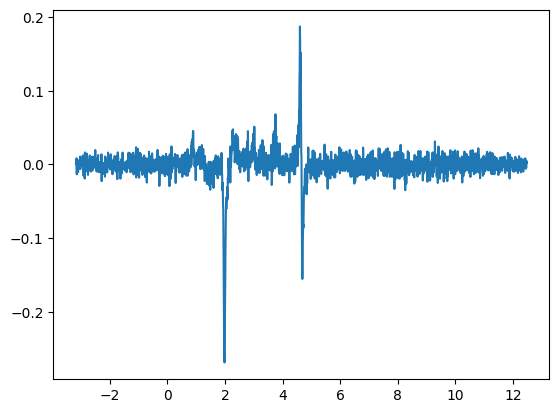

In [140]:
plt.plot(ppm[0], train[1][0]);

In [113]:
target, ppm = load_target()

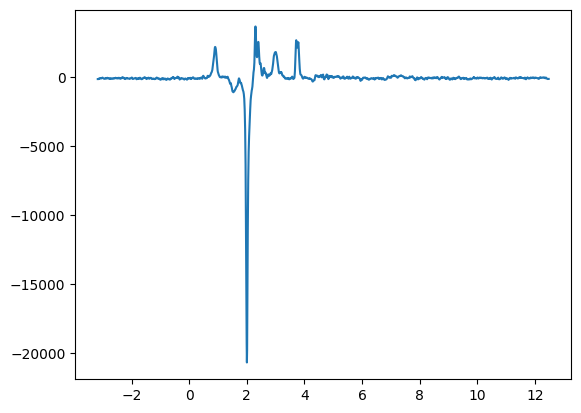

In [114]:
plt.plot(ppm[0], target[0]);